# California House Price (Exploratory Data Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data=pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data['income_cat']=np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat']<5,5.0,inplace=True)

In [5]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['income_cat']):
    train_set=data.loc[train_index]
    test_set=data.loc[test_index]

In [6]:
train_set.drop('income_cat',axis=1,inplace=True)
test_set.drop('income_cat',axis=1,inplace=True)

In [7]:
train_set.to_csv("train_set.csv",index=False)
test_set.to_csv("test_set.csv",index=False)

In [8]:
data=pd.read_csv('train_set.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Text(0.5, 1.0, 'Distribution of households')

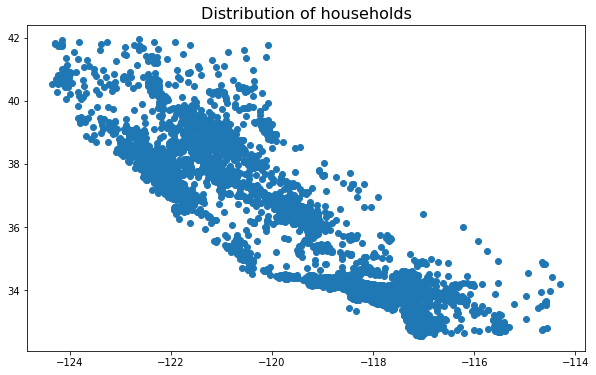

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'])
plt.title("Distribution of households",size=16)

Text(0.5, 1.0, 'Distribution of households')

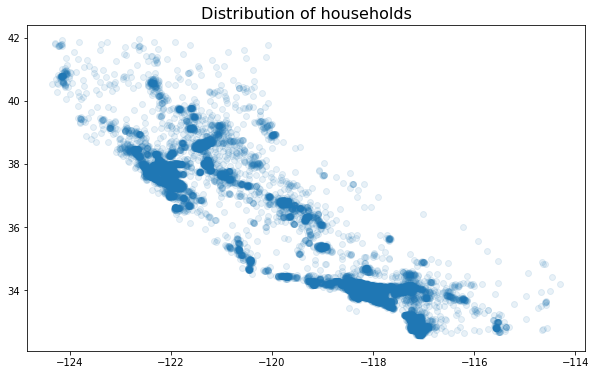

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

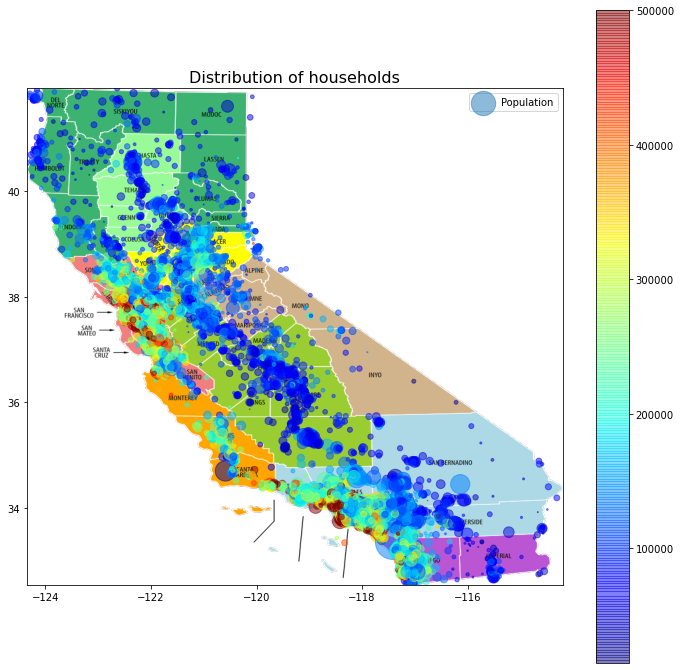

In [12]:
plt.figure(figsize=(12,12))
img=plt.imread('California.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.5,s=data['population']/30,c=data['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

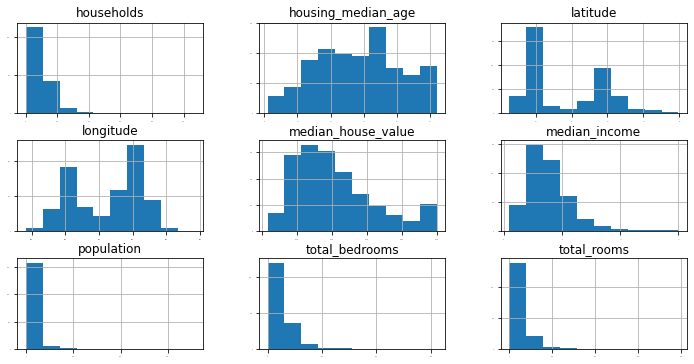

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, ax=ax)
plt.show()

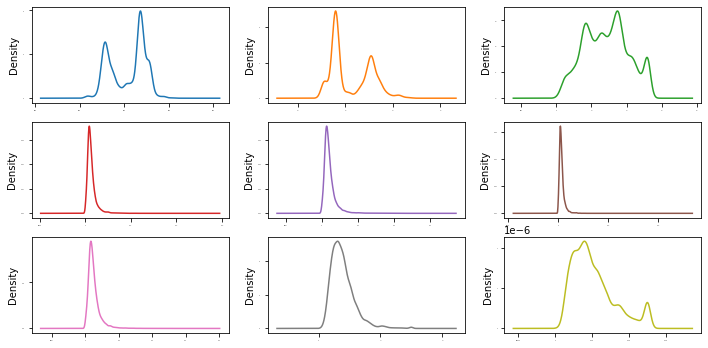

In [14]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=False, fontsize=1, figsize=(12,6))
plt.show()

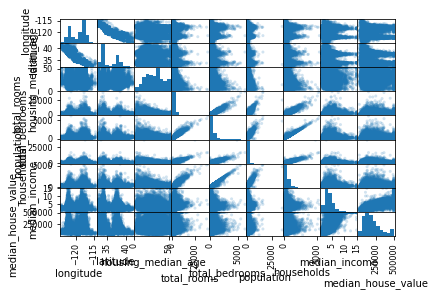

In [15]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(data, alpha=0.2)
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
X = data.drop(columns='ocean_proximity')

In [18]:
X = X.fillna(0)

In [19]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [20]:
vif

,VIF Factor,features
0,627.014916,longitude
1,564.954534,latitude
2,7.876236,housing_median_age
3,28.367530,total_rooms
4,50.825418,total_bedrooms
5,16.744505,population
6,63.153482,households
7,14.436924,median_income
8,9.944757,median_house_value


In [21]:
vif.sort_values(by='VIF Factor')

,VIF Factor,features
2,7.876236,housing_median_age
8,9.944757,median_house_value
7,14.436924,median_income
5,16.744505,population
3,28.367530,total_rooms
4,50.825418,total_bedrooms
6,63.153482,households
1,564.954534,latitude
0,627.014916,longitude
